# Importing Required Libraries

In [1]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os

# PATH OF PRE TRAINED MODEL

In [2]:
os.chdir('/Users/Harsha/Desktop/mask')
print(os.getcwd())

/Users/Harsha/Desktop/mask


In [3]:
path='/Users/Harsha/Desktop/mask'


# PATH FOR PROTOTXT AND CAFFEMODEL

In [4]:
prototxtPath = path+'/deploy.prototxt'
weightsPath = path+'/res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNet(prototxtPath, weightsPath)


In [5]:
model = load_model(path+'/model.model')

# READING THE IMAGES 

In [6]:
image = cv2.imread(path+'/Harsha.jpg')
orig = image.copy()
(h, w) = image.shape[:2]
image

array([[[214, 237, 239],
        [214, 237, 239],
        [214, 237, 239],
        ...,
        [ 82, 146, 201],
        [ 82, 146, 201],
        [ 82, 146, 201]],

       [[214, 237, 239],
        [214, 237, 239],
        [214, 237, 239],
        ...,
        [ 81, 145, 200],
        [ 81, 145, 200],
        [ 81, 145, 200]],

       [[214, 237, 239],
        [214, 237, 239],
        [214, 237, 239],
        ...,
        [ 81, 145, 199],
        [ 81, 145, 199],
        [ 81, 145, 199]],

       ...,

       [[ 64,  83, 121],
        [ 62,  81, 119],
        [ 63,  82, 119],
        ...,
        [122, 176, 209],
        [122, 176, 211],
        [122, 176, 211]],

       [[ 57,  76, 114],
        [ 58,  77, 114],
        [ 60,  79, 116],
        ...,
        [122, 176, 209],
        [121, 175, 210],
        [121, 175, 210]],

       [[ 51,  70, 108],
        [ 54,  73, 110],
        [ 59,  78, 115],
        ...,
        [122, 176, 209],
        [121, 175, 210],
        [121, 175, 210]]

# CREATING BLOB

In [7]:
blob = cv2.dnn.blobFromImage(image, 1.0,
                            (300, 300),
                             (104.0, 177.0, 123.0))

In [8]:
net.setInput(blob)
detections = net.forward()

# DETECTING THE FACES AND PREDICTING "MASK" OR "NO MASK"

In [9]:
for i in range(0, detections.shape[2]):
    # extract the confidence (i.e., probability) associated with the detection
    confidence = detections[0, 0, i, 2]

    # filter out weak detections by ensuring the confidence is greater than the minimum confidence
    if confidence > 0.5:
        # compute the (x, y)-coordinates of the bounding box for the object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # ensure the bounding boxes fall within the dimensions of the frame
        (startX, startY) = (max(0, startX), max(0, startY))
        (endX, endY) = (min(w - 1, endX), min(h - 1, endY))

        # extract the face ROI, convert it from BGR to RGB channel
        # resize it to 224x224, and preprocess it
        face = image[startY:endY, startX:endX]
        #face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
        face = cv2.resize(face, (224, 224))
        face = img_to_array(face)
        face = preprocess_input(face)
        face = np.expand_dims(face, axis=0)

        # pass the face through the model to determine if the face has a mask or not
        (mask, withoutMask) = model.predict(face)[0] #taking only 1st one-hot vector

        # determine the class label and color we'll use to draw the bounding box and text
        label = "Mask" if mask > withoutMask else "No Mask"
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

        # include the probability in the label
        label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

        # display the label and bounding box rectangle on the output frame
        cv2.putText(image, label, 
                    (startX, startY - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 
                    0.45, 
                    color, 
                    2)
        cv2.rectangle(image, 
                      (startX, startY), 
                      (endX, endY), 
                      color, 
                      2)

In [10]:
cv2.imshow("Output", image)
cv2.waitKey(10)
cv2.destroyAllWindows()

In [11]:
from matplotlib import pyplot as plt


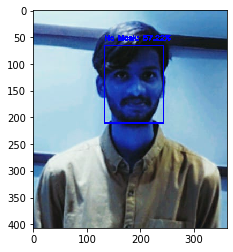

In [12]:
plt.imshow(image)
plt.show()